In [9]:
from google.colab import files
import zipfile
import os

# Upload the dataset
uploaded = files.upload()

# Extract the uploaded zip file
for filename in uploaded.keys():
    zip_path = filename
    break

extract_path = '/content/CamSeq01'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extracted files:", os.listdir(extract_path))


Saving CamSeq01.zip to CamSeq01 (1).zip
Extracted files: ['0016E5_07989.png', '0016E5_08101_L.png', '0016E5_08141.png', '0016E5_07997.png', '0016E5_08075_L.png', '0016E5_08069.png', '0016E5_07999_L.png', '0016E5_08057.png', '0016E5_08017_L.png', '0016E5_08019.png', '0016E5_08033_L.png', '0016E5_08013_L.png', '0016E5_08061.png', '0016E5_07995.png', '0016E5_07971.png', '0016E5_08085.png', '0016E5_08041.png', '0016E5_08057_L.png', '0016E5_08073_L.png', '0016E5_08125_L.png', '0016E5_07993.png', '0016E5_08077_L.png', '0016E5_08123.png', '0016E5_07981.png', '0016E5_07993_L.png', '0016E5_08071_L.png', '0016E5_08041_L.png', '0016E5_08019_L.png', '0016E5_08113_L.png', '0016E5_08055.png', '0016E5_07975.png', '0016E5_08017.png', '0016E5_07975_L.png', '0016E5_08053.png', '0016E5_08045_L.png', '0016E5_08067.png', '0016E5_08001.png', '0016E5_08051_L.png', '0016E5_07983.png', '0016E5_08065.png', '0016E5_08121.png', '0016E5_08095.png', '0016E5_08147.png', '0016E5_08121_L.png', '0016E5_08013.png', '001

In [10]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers


In [11]:
def load_images_from_folder(folder):
    images = []
    labels = []  # Placeholder for labels, modify based on your data

    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)

        if img is not None:
            img = cv2.resize(img, (224, 224))  # Resize images to a standard size
            images.append(img)

            # Dummy labels, update this to your actual labels
            labels.append(0)  # Example: 0 for 'go straight', 1 for 'turn left', etc.

    images = np.array(images)
    labels = np.array(labels)
    return images, labels

data_dir = '/content/CamSeq01'
images, labels = load_images_from_folder(data_dir)

# Normalize the images
images = images / 255.0


In [12]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [13]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Change to 'softmax' if you have multiple classes
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Change to 'sparse_categorical_crossentropy' for multiple classes
              metrics=['accuracy'])


In [14]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.9761 - loss: 0.2594 - val_accuracy: 1.0000 - val_loss: 8.8194e-35
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 1.0000 - loss: 3.4116e-35 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 1.0000 - loss: 0.000

In [15]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 230ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Test Accuracy: 100.00%


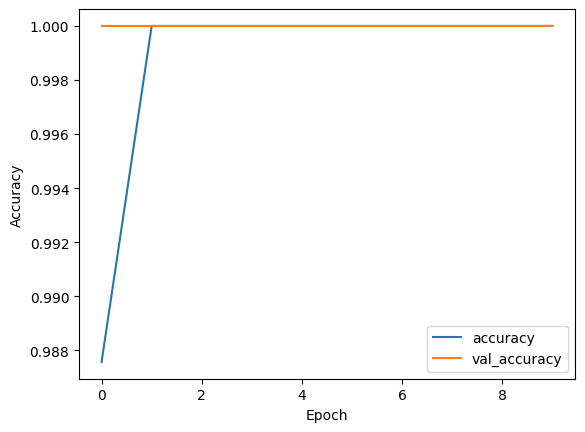

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
